In [1]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np 


In [2]:
from sklearn import metrics
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_csv("scenario2-training-dataset-transformed-tf.csv")


In [4]:
df = df1.sample(frac=1).reset_index(drop=True)


In [5]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
df['user'] = label_encoding.fit_transform(df['user'])
df['source'] = label_encoding.fit_transform(df['source'])
df['action'] = label_encoding.fit_transform(df['action'].astype(str))

In [6]:
corr = df.corr()

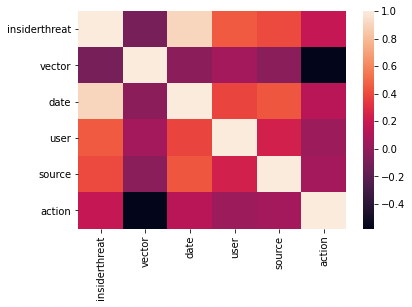

In [7]:
import seaborn as sns 
ax = sns.heatmap(corr)

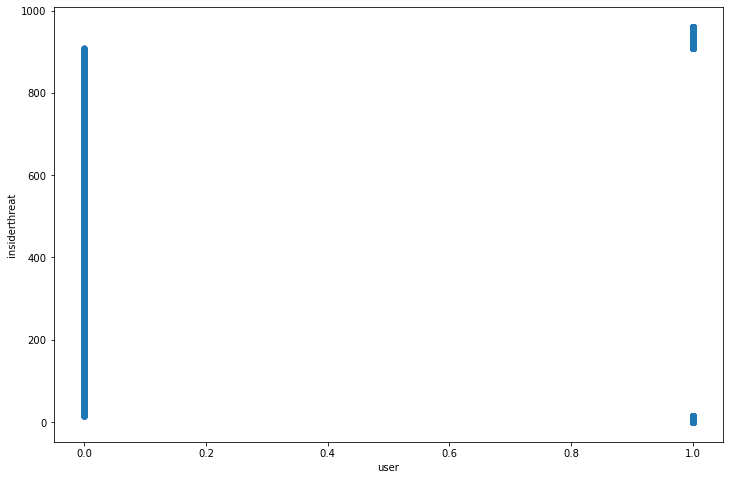

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(df['insiderthreat'], df['user'], s=25)
plt.xlabel('user')
plt.ylabel('insiderthreat')
plt.show()

In [9]:

from sklearn.preprocessing import StandardScaler
df_arr = StandardScaler().fit_transform(df)

0         1         2         3         4         5
13351  1.234166  0.803366 -1.026511 -1.114810 -0.506323  0.072554
16439 -1.620168 -1.934865 -0.278346 -0.049853 -0.004505  0.299415
22979 -0.665273  0.751278  1.784414  0.718716 -0.568647  0.001894
1405  -1.384769  1.101870 -1.694645  1.088209 -0.044004  0.323236
10224  1.572476  2.396404 -0.531689 -0.172317  0.915483  0.034098
62    -0.421096  1.190782 -0.693016  1.526764 -0.229308 -0.110634
540   -1.572215  1.654099  0.665434 -0.529403  0.647814 -0.256213
617    2.267259  1.429688  0.443643  0.448763 -0.264870  0.122397
9787  -1.386998 -0.159497 -0.241000 -0.827572 -1.162692 -0.282672
17209 -1.871188  1.201639  0.165623 -0.490621  0.272907  0.038964

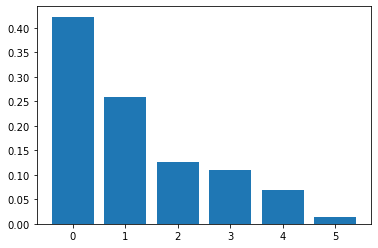

In [10]:
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(df_arr)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
PCA_components = pd.DataFrame(principalComponents)
PCA_components.sample(n=10)

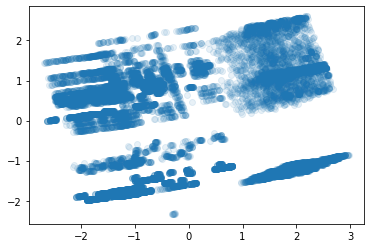

In [11]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1)


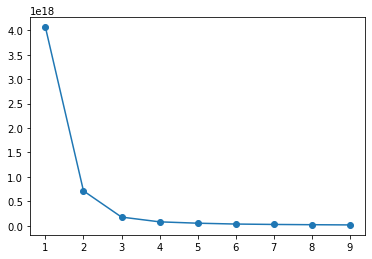

In [12]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertias.append(model.inertia_)
plt.plot(ks, inertias, '-o')
plt.show()

In [18]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
df['cluster'] = kmeans.labels_

<AxesSubplot:xlabel='cluster', ylabel='user'>

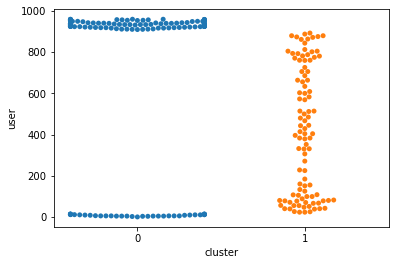

In [19]:
df_sam = df.sample(frac=0.01).reset_index(drop=True)
sns.swarmplot(df_sam.cluster, df_sam.user)

<AxesSubplot:xlabel='cluster', ylabel='insiderthreat'>

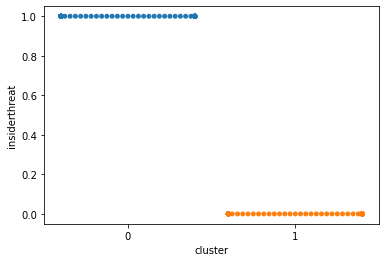

In [20]:
sns.swarmplot(df_sam.cluster, df_sam.insiderthreat)

<AxesSubplot:xlabel='cluster', ylabel='date'>

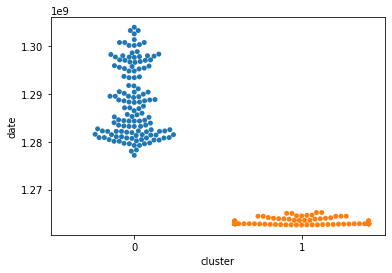

In [21]:
sns.swarmplot(df_sam.cluster, df_sam.date)

<AxesSubplot:xlabel='cluster', ylabel='action'>

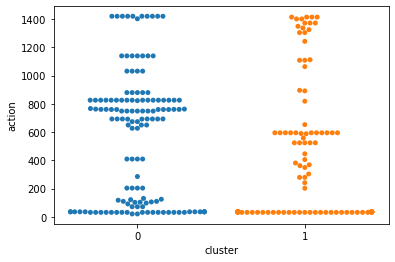

In [22]:
sns.swarmplot(df_sam.cluster, df_sam.action)

In [23]:
df.columns

Index(['insiderthreat', 'vector', 'date', 'user', 'source', 'action',
       'cluster'],
      dtype='object')

<AxesSubplot:xlabel='cluster', ylabel='source'>

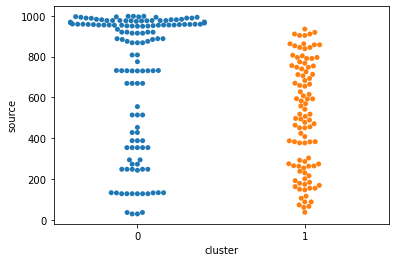

In [24]:
sns.swarmplot(df_sam.cluster, df_sam.source)

<AxesSubplot:xlabel='cluster', ylabel='vector'>

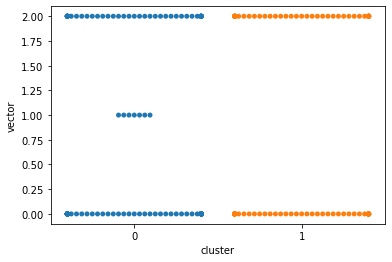

In [25]:
sns.swarmplot(df_sam.cluster, df_sam.vector)